In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [57]:
a1 = 2.67   # cm/s^2
a2 = -a1
t0 = 7.5   # s

In [58]:
t = np.linspace(0, 2*t0, 1000)
dt = t[1] - t[0]
mask = t > t0

a = mask * (a2) + np.logical_not(mask) * a1

dv = a * dt
v = np.cumsum(dv)

dx = v * dt
x = np.cumsum(dx)

print(x[-1])

150.48832616400108


[  66.75        100.125       133.5        ... -133.49999994 -100.12500002
  -66.75000002]


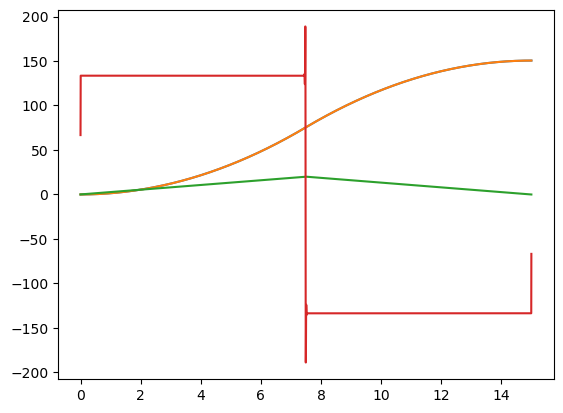

In [88]:
plt.plot(t, x, label='x')

N = 3000
data = t[:N], x[:N]
newdt = 0.002

f = interp1d(*data, kind=2)
newt = np.arange(0, data[0][-1], newdt)
newx = f(newt)

newv = np.gradient(newx) / newdt
newa = np.gradient(newv) / newdt * 50

print(newa)


plt.plot(newt, newx)
plt.plot(newt, newv)
plt.plot(newt, newa)

len(xs)=3000


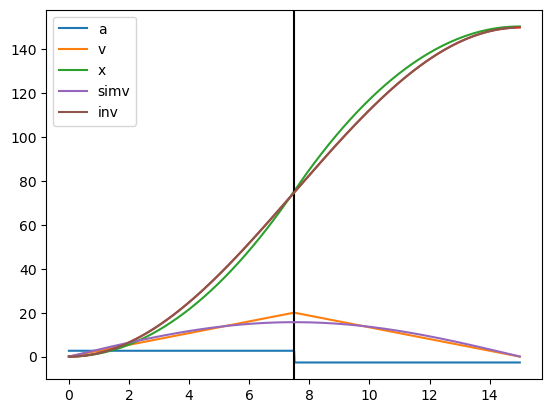

In [72]:
plt.plot(t, a, label='a')
plt.plot(t, v, label='v')
plt.plot(t, x, label='x')

plt.axvline(t0, c='k')

simx = -np.cos(t / t0 * 3.14 / 2) * 75 + 75
plt.plot(t, simx)

plt.plot(t, np.gradient(simx) / dt, label='simv')

# xs = np.linspace(0, 150, 1000)
xs = np.arange(0, 150, 0.05)
print(f'{len(xs)=}')
ts = 2*t0/3.14 * np.arccos(1 - xs/75)
plt.plot(ts, xs, label='inv')

plt.legend()

In [95]:
print(ts[:10])
print(ts[-10:])

[0.         0.17444363 0.24671426 0.30217882 0.34894544 0.39015456
 0.42741669 0.46168848 0.49359322 0.52356381]
[14.45569277 14.48404441 14.514015   14.54591974 14.58019153 14.61745365
 14.65866277 14.7054294  14.76089396 14.83316459]


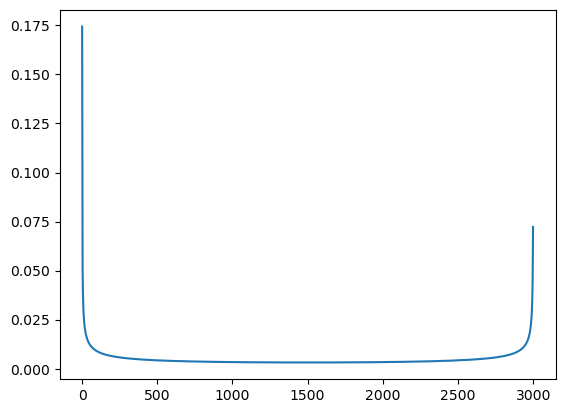

In [60]:
# plt.plot(ts)
plt.plot(np.gradient(ts))

In [68]:
N = 3000
data = ts[:N], xs[:N]
newdt = 0.001

f = interp1d(*data)
newt = np.arange(0, data[0][-1], newdt)
newx = f(newt)

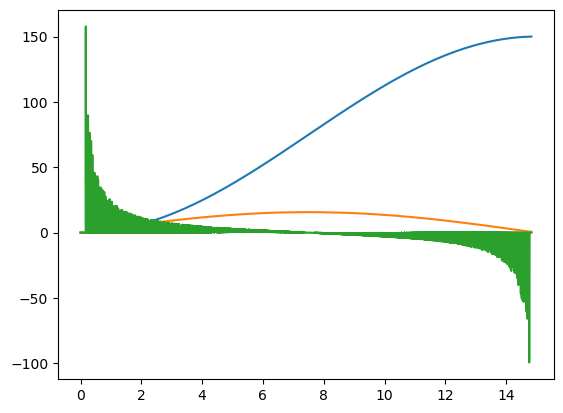

In [73]:
plt.plot(newt, newx)

newv = np.gradient(newx) / newdt
plt.plot(newt, newv)

newa = np.gradient(newv) / newdt
plt.plot(newt, newa)